**Project Title:**

Diabetes Prediction Using Machine Learning

**Project Description:**

This project aims to predict the likelihood of a person developing diabetes based on various medical attributes such as age, gender, hypertension, heart disease, smoking history, body mass index (BMI), HbA1c level, and blood glucose levels. Using logistic regression as the primary machine learning algorithm, the model will classify whether a person is likely to have diabetes. The dataset is processed to handle both categorical and numerical features, with a focus on gender and smoking history requiring encoding.

The project evaluates the model's performance through a confusion matrix and key classification metrics such as accuracy, precision, recall, and F1-score. Additionally, advanced visualizations like the ROC curve and a heatmap of the confusion matrix are employed to provide deeper insights into the model's performance. This project highlights the use of logistic regression in medical diagnosis and demonstrates how machine learning can support decision-making in healthcare.

In [ ]:
pip install pandas scikit-learn numpy


In [11]:
print("Dataset preview:")
print(data.head())

Dataset preview:
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [12]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB
None


In [13]:
print("\nDataset Description:")
print(data.describe())


Dataset Description:
              gender            age  hypertension  heart_disease  \
count  100000.000000  100000.000000  100000.00000  100000.000000   
mean        0.414660      41.885856       0.07485       0.039420   
std         0.493031      22.516840       0.26315       0.194593   
min         0.000000       0.080000       0.00000       0.000000   
25%         0.000000      24.000000       0.00000       0.000000   
50%         0.000000      43.000000       0.00000       0.000000   
75%         1.000000      60.000000       0.00000       0.000000   
max         2.000000      80.000000       1.00000       1.000000   

       smoking_history            bmi    HbA1c_level  blood_glucose_level  \
count    100000.000000  100000.000000  100000.000000        100000.000000   
mean          2.179650      27.320767       5.527507           138.058060   
std           1.889659       6.636783       1.070672            40.708136   
min           0.000000      10.010000       3.500000     

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = '/content/diabetes_prediction_dataset.csv'
data = pd.read_csv(url)


# Preprocess the categorical data using Label Encoding & Convert gender to numerical values
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])  # Male: 1, Female: 0
data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])  # Encode smoking_history

# View transformed data
print("\nTransformed dataset preview:")
print(data.head())




Transformed dataset preview:
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [16]:
# Features and target variables
X = data.drop('diabetes', axis=1)  # Features
y = data['diabetes']  # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy * 100:.2f}%")


Confusion Matrix:
[[18127   165]
 [  661  1047]]

Accuracy: 95.87%


In [ ]:
pip install seaborn matplotlib


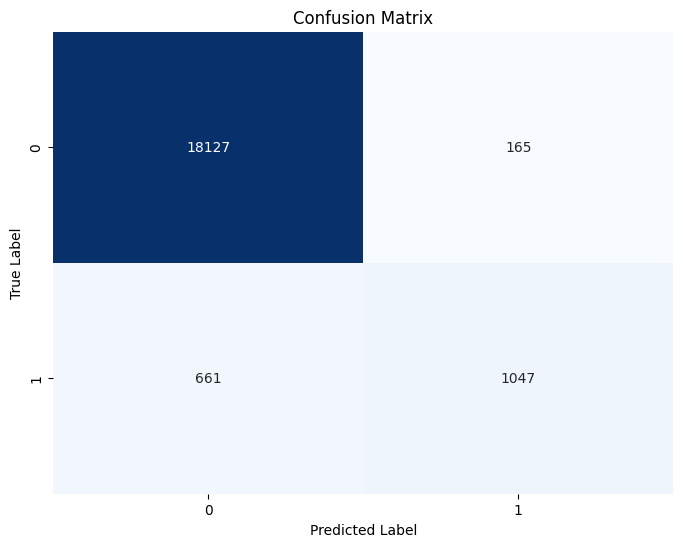

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

plot_confusion_matrix(conf_matrix)

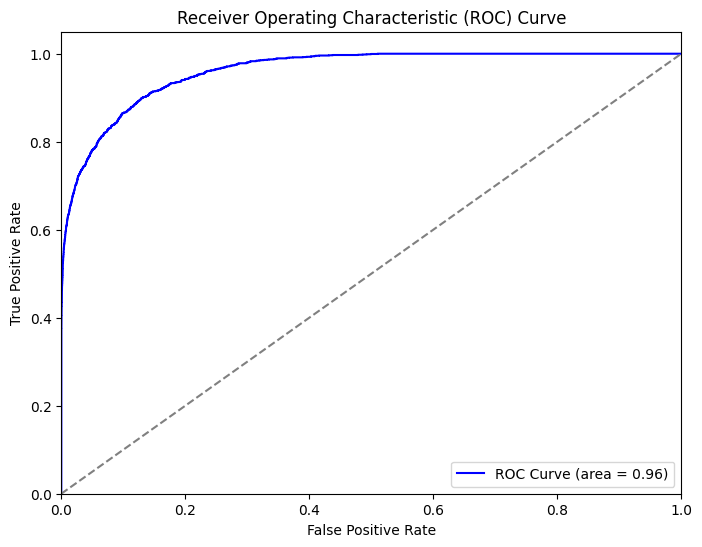

In [18]:
from sklearn.metrics import roc_curve, auc

# Generate probabilities for ROC curve
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Draw Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

